In [ ]:
import pandas as pd
import numpy as np
import collections
import re

In [ ]:
f=open("text.txt")
doc1=f.read()
f.close()



In [ ]:

doc1

"The serene beauty of the natural world never fails to captivate the human spirit. From the majestic mountains that touch the sky to the tranquil lakes hidden in lush forests, nature's wonders are a source of inspiration for many. The rustling leaves in an ancient woodland, the gentle ripple of a stream, and the vibrant colors of a sunset all remind us of the world's infinite beauty. As we stand in awe of these wonders, we are reminded of the importance of preserving our planet for future generations. Nature's gifts are a reminder of the delicate balance that sustains life on Earth, and it's our responsibility to protect and cherish this precious ecosystem."

In [ ]:
l_doc1 = re.sub(r"[^a-zA-Z0-9]", " ", doc1.lower()).split()


In [ ]:
l_doc1

['the',
 'serene',
 'beauty',
 'of',
 'the',
 'natural',
 'world',
 'never',
 'fails',
 'to',
 'captivate',
 'the',
 'human',
 'spirit',
 'from',
 'the',
 'majestic',
 'mountains',
 'that',
 'touch',
 'the',
 'sky',
 'to',
 'the',
 'tranquil',
 'lakes',
 'hidden',
 'in',
 'lush',
 'forests',
 'nature',
 's',
 'wonders',
 'are',
 'a',
 'source',
 'of',
 'inspiration',
 'for',
 'many',
 'the',
 'rustling',
 'leaves',
 'in',
 'an',
 'ancient',
 'woodland',
 'the',
 'gentle',
 'ripple',
 'of',
 'a',
 'stream',
 'and',
 'the',
 'vibrant',
 'colors',
 'of',
 'a',
 'sunset',
 'all',
 'remind',
 'us',
 'of',
 'the',
 'world',
 's',
 'infinite',
 'beauty',
 'as',
 'we',
 'stand',
 'in',
 'awe',
 'of',
 'these',
 'wonders',
 'we',
 'are',
 'reminded',
 'of',
 'the',
 'importance',
 'of',
 'preserving',
 'our',
 'planet',
 'for',
 'future',
 'generations',
 'nature',
 's',
 'gifts',
 'are',
 'a',
 'reminder',
 'of',
 'the',
 'delicate',
 'balance',
 'that',
 'sustains',
 'life',
 'on',
 'earth',


In [ ]:
l=l_doc1

In [ ]:
l

['the',
 'serene',
 'beauty',
 'of',
 'the',
 'natural',
 'world',
 'never',
 'fails',
 'to',
 'captivate',
 'the',
 'human',
 'spirit',
 'from',
 'the',
 'majestic',
 'mountains',
 'that',
 'touch',
 'the',
 'sky',
 'to',
 'the',
 'tranquil',
 'lakes',
 'hidden',
 'in',
 'lush',
 'forests',
 'nature',
 's',
 'wonders',
 'are',
 'a',
 'source',
 'of',
 'inspiration',
 'for',
 'many',
 'the',
 'rustling',
 'leaves',
 'in',
 'an',
 'ancient',
 'woodland',
 'the',
 'gentle',
 'ripple',
 'of',
 'a',
 'stream',
 'and',
 'the',
 'vibrant',
 'colors',
 'of',
 'a',
 'sunset',
 'all',
 'remind',
 'us',
 'of',
 'the',
 'world',
 's',
 'infinite',
 'beauty',
 'as',
 'we',
 'stand',
 'in',
 'awe',
 'of',
 'these',
 'wonders',
 'we',
 'are',
 'reminded',
 'of',
 'the',
 'importance',
 'of',
 'preserving',
 'our',
 'planet',
 'for',
 'future',
 'generations',
 'nature',
 's',
 'gifts',
 'are',
 'a',
 'reminder',
 'of',
 'the',
 'delicate',
 'balance',
 'that',
 'sustains',
 'life',
 'on',
 'earth',


In [ ]:
wordset=set(l)

In [ ]:
wordset

{'a',
 'all',
 'an',
 'ancient',
 'and',
 'are',
 'as',
 'awe',
 'balance',
 'beauty',
 'captivate',
 'cherish',
 'colors',
 'delicate',
 'earth',
 'ecosystem',
 'fails',
 'for',
 'forests',
 'from',
 'future',
 'generations',
 'gentle',
 'gifts',
 'hidden',
 'human',
 'importance',
 'in',
 'infinite',
 'inspiration',
 'it',
 'lakes',
 'leaves',
 'life',
 'lush',
 'majestic',
 'many',
 'mountains',
 'natural',
 'nature',
 'never',
 'of',
 'on',
 'our',
 'planet',
 'precious',
 'preserving',
 'protect',
 'remind',
 'reminded',
 'reminder',
 'responsibility',
 'ripple',
 'rustling',
 's',
 'serene',
 'sky',
 'source',
 'spirit',
 'stand',
 'stream',
 'sunset',
 'sustains',
 'that',
 'the',
 'these',
 'this',
 'to',
 'touch',
 'tranquil',
 'us',
 'vibrant',
 'we',
 'wonders',
 'woodland',
 'world'}

In [ ]:
def calculateBOW(wordset,l_doc):
  tf_diz = dict.fromkeys(wordset,0)
  for word in l_doc:
      tf_diz[word]=l_doc.count(word)
  return tf_diz

In [ ]:
bow1 = calculateBOW(wordset,l_doc1)
df_bow = pd.DataFrame([bow1])
df_bow.head()

,human,all,reminder,that,fails,stream,earth,remind,touch,from,...,world,woodland,sunset,infinite,stand,tranquil,wonders,ripple,colors,on
0,1,1,1,2,1,1,1,1,1,1,...,2,1,1,1,1,1,2,1,1,1


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [ ]:
X = vectorizer.fit_transform([doc1])
df_bow_sklearn = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
df_bow_sklearn.head()

,all,an,ancient,and,are,as,awe,balance,beauty,captivate,...,this,to,touch,tranquil,us,vibrant,we,wonders,woodland,world
0,1,1,1,3,3,1,1,1,2,1,...,1,3,1,1,1,1,2,2,1,2


In [ ]:
print(vectorizer.get_feature_names_out())

['all' 'an' 'ancient' 'and' 'are' 'as' 'awe' 'balance' 'beauty'
 'captivate' 'cherish' 'colors' 'delicate' 'earth' 'ecosystem' 'fails'
 'for' 'forests' 'from' 'future' 'generations' 'gentle' 'gifts' 'hidden'
 'human' 'importance' 'in' 'infinite' 'inspiration' 'it' 'lakes' 'leaves'
 'life' 'lush' 'majestic' 'many' 'mountains' 'natural' 'nature' 'never'
 'of' 'on' 'our' 'planet' 'precious' 'preserving' 'protect' 'remind'
 'reminded' 'reminder' 'responsibility' 'ripple' 'rustling' 'serene' 'sky'
 'source' 'spirit' 'stand' 'stream' 'sunset' 'sustains' 'that' 'the'
 'these' 'this' 'to' 'touch' 'tranquil' 'us' 'vibrant' 'we' 'wonders'
 'woodland' 'world']


In [ ]:
import nltk
nltk.download('punkt')
import re
import numpy as np

f= open("text.txt")
text=f.read()
f.close()
dataset = nltk.sent_tokenize(text)
for i in range(len(dataset)):
    dataset[i] = dataset[i].lower()
    dataset[i] = re.sub(r'\W', ' ', dataset[i])
    dataset[i] = re.sub(r'\s+', ' ', dataset[i])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
print(dataset)

[' it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness ']


In [ ]:
word2count = {}
for data in dataset:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

In [ ]:
word2count

{'the': 12,
 'serene': 1,
 'beauty': 2,
 'of': 9,
 'natural': 1,
 'world': 2,
 'never': 1,
 'fails': 1,
 'to': 3,
 'captivate': 1,
 'human': 1,
 'spirit': 1,
 'from': 1,
 'majestic': 1,
 'mountains': 1,
 'that': 2,
 'touch': 1,
 'sky': 1,
 'tranquil': 1,
 'lakes': 1,
 'hidden': 1,
 'in': 3,
 'lush': 1,
 'forests': 1,
 'nature': 2,
 's': 4,
 'wonders': 2,
 'are': 3,
 'a': 4,
 'source': 1,
 'inspiration': 1,
 'for': 2,
 'many': 1,
 'rustling': 1,
 'leaves': 1,
 'an': 1,
 'ancient': 1,
 'woodland': 1,
 'gentle': 1,
 'ripple': 1,
 'stream': 1,
 'and': 3,
 'vibrant': 1,
 'colors': 1,
 'sunset': 1,
 'all': 1,
 'remind': 1,
 'us': 1,
 'infinite': 1,
 'as': 1,
 'we': 2,
 'stand': 1,
 'awe': 1,
 'these': 1,
 'reminded': 1,
 'importance': 1,
 'preserving': 1,
 'our': 2,
 'planet': 1,
 'future': 1,
 'generations': 1,
 'gifts': 1,
 'reminder': 1,
 'delicate': 1,
 'balance': 1,
 'sustains': 1,
 'life': 1,
 'on': 1,
 'earth': 1,
 'it': 1,
 'responsibility': 1,
 'protect': 1,
 'cherish': 1,
 'this': 

In [ ]:
words


['nature',
 's',
 'gifts',
 'are',
 'a',
 'reminder',
 'of',
 'the',
 'delicate',
 'balance',
 'that',
 'sustains',
 'life',
 'on',
 'earth',
 'and',
 'it',
 's',
 'our',
 'responsibility',
 'to',
 'protect',
 'and',
 'cherish',
 'this',
 'precious',
 'ecosystem']

In [ ]:
len(words)

27

In [ ]:
vocab_size = len(wordset)
embed_dim = 10
context_size = 4

In [ ]:
word_to_ix = {word: i for i, word in enumerate(wordset)}
ix_to_word = {i: word for i, word in enumerate(wordset)}

In [ ]:
word_to_ix

{'human': 0,
 'all': 1,
 'reminder': 2,
 'that': 3,
 'fails': 4,
 'stream': 5,
 'earth': 6,
 'remind': 7,
 'touch': 8,
 'from': 9,
 'delicate': 10,
 'captivate': 11,
 'responsibility': 12,
 'ancient': 13,
 'of': 14,
 'rustling': 15,
 'planet': 16,
 'sustains': 17,
 'leaves': 18,
 'lakes': 19,
 'serene': 20,
 'nature': 21,
 'sky': 22,
 'never': 23,
 'spirit': 24,
 'to': 25,
 'for': 26,
 'the': 27,
 'awe': 28,
 'gifts': 29,
 'gentle': 30,
 'it': 31,
 'in': 32,
 'many': 33,
 'this': 34,
 'protect': 35,
 'inspiration': 36,
 's': 37,
 'natural': 38,
 'an': 39,
 'reminded': 40,
 'ecosystem': 41,
 'majestic': 42,
 'we': 43,
 'precious': 44,
 'life': 45,
 'a': 46,
 'these': 47,
 'as': 48,
 'our': 49,
 'future': 50,
 'mountains': 51,
 'forests': 52,
 'importance': 53,
 'generations': 54,
 'balance': 55,
 'lush': 56,
 'and': 57,
 'are': 58,
 'vibrant': 59,
 'cherish': 60,
 'hidden': 61,
 'beauty': 62,
 'source': 63,
 'us': 64,
 'preserving': 65,
 'world': 66,
 'woodland': 67,
 'sunset': 68,
 'in

In [ ]:
ix_to_word

{0: 'human',
 1: 'all',
 2: 'reminder',
 3: 'that',
 4: 'fails',
 5: 'stream',
 6: 'earth',
 7: 'remind',
 8: 'touch',
 9: 'from',
 10: 'delicate',
 11: 'captivate',
 12: 'responsibility',
 13: 'ancient',
 14: 'of',
 15: 'rustling',
 16: 'planet',
 17: 'sustains',
 18: 'leaves',
 19: 'lakes',
 20: 'serene',
 21: 'nature',
 22: 'sky',
 23: 'never',
 24: 'spirit',
 25: 'to',
 26: 'for',
 27: 'the',
 28: 'awe',
 29: 'gifts',
 30: 'gentle',
 31: 'it',
 32: 'in',
 33: 'many',
 34: 'this',
 35: 'protect',
 36: 'inspiration',
 37: 's',
 38: 'natural',
 39: 'an',
 40: 'reminded',
 41: 'ecosystem',
 42: 'majestic',
 43: 'we',
 44: 'precious',
 45: 'life',
 46: 'a',
 47: 'these',
 48: 'as',
 49: 'our',
 50: 'future',
 51: 'mountains',
 52: 'forests',
 53: 'importance',
 54: 'generations',
 55: 'balance',
 56: 'lush',
 57: 'and',
 58: 'are',
 59: 'vibrant',
 60: 'cherish',
 61: 'hidden',
 62: 'beauty',
 63: 'source',
 64: 'us',
 65: 'preserving',
 66: 'world',
 67: 'woodland',
 68: 'sunset',
 69:

In [ ]:
data = []
for i in range(2, len(words) - 2):
    context = [words[i - 2], words[i - 1], words[i + 1], words[i + 2]]
    target = words[i]
    data.append((context, target))
print(data[:5])

[(['nature', 's', 'are', 'a'], 'gifts'), (['s', 'gifts', 'a', 'reminder'], 'are'), (['gifts', 'are', 'reminder', 'of'], 'a'), (['are', 'a', 'of', 'the'], 'reminder'), (['a', 'reminder', 'the', 'delicate'], 'of')]


In [ ]:
embeddings =  np.random.random_sample((vocab_size, embed_dim))

In [ ]:
embeddings

array([[9.12222698e-01, 5.38407419e-01, 9.68631141e-02, 8.30571582e-01,
        6.10027556e-01, 8.11892142e-01, 3.71518107e-02, 3.64327276e-01,
        3.57437585e-01, 9.67171914e-01],
       [1.52713170e-01, 2.12854607e-01, 3.84255822e-01, 5.28004134e-02,
        8.04966918e-01, 2.86968994e-01, 5.44794016e-01, 6.62984588e-01,
        2.65851058e-01, 1.81030686e-01],
       [3.68127206e-01, 9.69108035e-01, 8.47398971e-01, 1.52999612e-01,
        3.25504059e-01, 3.68678849e-01, 6.68237698e-01, 8.58388571e-02,
        7.32028980e-01, 1.45427415e-01],
       [9.67996757e-01, 2.57209009e-01, 5.15578031e-01, 2.90092446e-01,
        5.32155517e-01, 4.67651220e-02, 2.05433425e-01, 6.80017800e-01,
        1.61510089e-02, 7.32363345e-02],
       [9.05323498e-01, 5.68021661e-01, 9.35170515e-01, 7.86316259e-01,
        3.29258452e-01, 1.83791192e-02, 9.63292128e-01, 9.74251920e-01,
        2.07779266e-01, 9.99552081e-01],
       [6.69390906e-01, 5.13299168e-02, 1.80912641e-01, 2.88025751e-01,
   

In [ ]:
def linear(m, theta):
    w = theta
    return m.dot(w)

In [ ]:
def log_softmax(x):
    e_x = np.exp(x - np.max(x))
    return np.log(e_x / e_x.sum())
def NLLLoss(logs, targets):
    out = logs[range(len(targets)), targets]
    return -out.sum()/len(out)

In [ ]:
import tensorflow as tf
import keras.backend as k
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda

In [ ]:
def log_softmax_crossentropy_with_logits(logits,target):

    out = np.zeros_like(logits)
    out[np.arange(len(logits)),target] = 1

    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)

    return (- out + softmax) / logits.shape[0]

In [ ]:
def forward(context_idxs, theta):
    m = embeddings[context_idxs].reshape(1, -1)
    n = linear(m, theta)
    o = log_softmax(n)

    return m, n, o

In [ ]:
def backward(preds, theta, target_idxs):
    m, n, o = preds

    dlog = log_softmax_crossentropy_with_logits(n, target_idxs)
    dw = m.T.dot(dlog)

    return dw

In [ ]:
def optimize(theta, grad, lr=0.03):
    theta -= grad * lr
    return theta

In [ ]:
theta = np.random.uniform(-1, 1, ( context_size * embed_dim, vocab_size))

In [ ]:
epoch_losses = {}

for epoch in range(80):

    losses =  []

    for context, target in data:
        context_idxs = np.array([word_to_ix[w] for w in context])
        preds = forward(context_idxs, theta)

        target_idxs = np.array([word_to_ix[target]])
        loss = NLLLoss(preds[-1], target_idxs)

        losses.append(loss)

        grad = backward(preds, theta, target_idxs)
        theta = optimize(theta, grad, lr=0.03)

        epoch_losses[epoch] = losses

Text(0, 0.5, 'Losses')

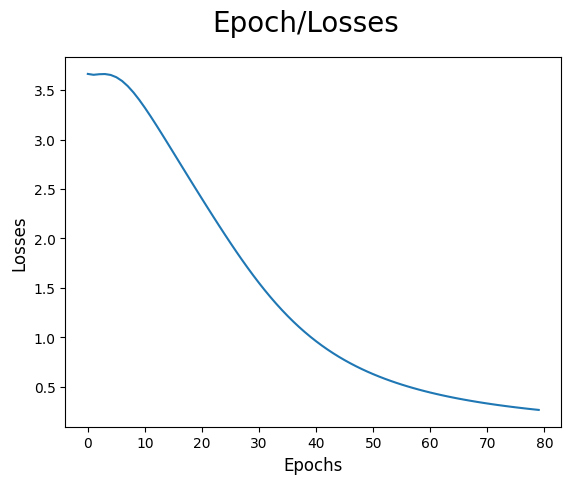

In [ ]:
import matplotlib.pyplot as plt
ix = np.arange(0,80)

fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix,[epoch_losses[i][0] for i in ix])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Losses', fontsize=12)

In [ ]:
def predict(words):
    context_idxs = np.array([word_to_ix[w] for w in words])
    preds = forward(context_idxs, theta)
    word = ix_to_word[np.argmax(preds[-1])]

    return word
predict(['as', 'life', 'in', 'it'])

'life'

In [ ]:
def accuracy():
    wrong = 0

    for context, target in data:
        if(predict(context) != target):
            wrong += 1

    return (1 - (wrong / len(data)))
accuracy()

1.0